In [12]:
import numpy as np
import argparse
import imutils
import glob
import cv2
import cv2


0.27350427350427353


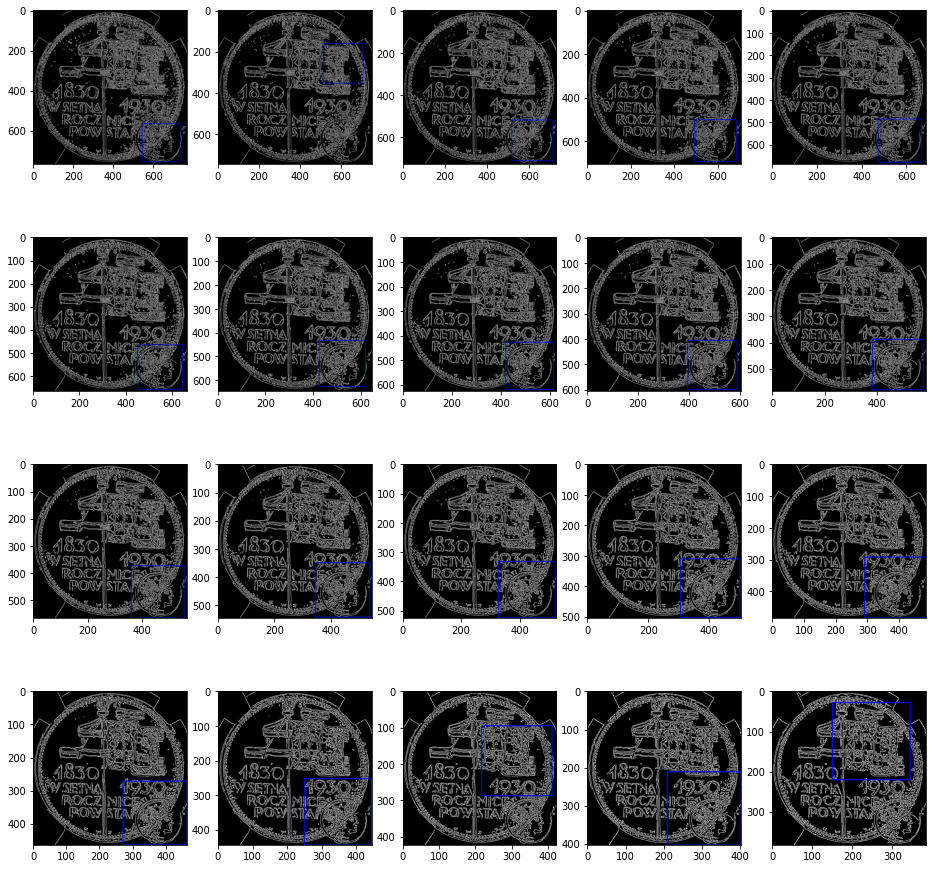

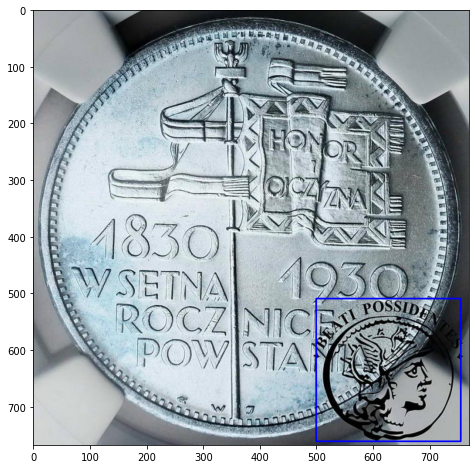

In [13]:
visualize = True

name = './339_2.jpg'
image = cv2.imread(name)
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
found = None

template = cv2.imread('./logo_single_2.png', 0)
_, template = cv2.threshold(template,1,255,cv2.THRESH_BINARY_INV)
ratio = 0.25 * image.shape[0] / template.shape[0]
template = cv2.resize(template, None, fx=ratio, fy=ratio, interpolation=cv2.INTER_AREA) # downsampling
template = cv2.Canny(template, 50, 200)
(tH, tW) = template.shape[:2]

if visualize:
	fig, ax = plt.subplots(4, 5, figsize=(16, 16))
	ax = ax.flatten()

for i, scale in enumerate(np.linspace(0.5, 1.0, 20)[::-1]):
	resized = imutils.resize(gray, width = int(gray.shape[1] * scale))
	r = gray.shape[1] / float(resized.shape[1])

	if resized.shape[0] < tH or resized.shape[1] < tW:
		break

	edged = cv2.Canny(resized, 100, 200)
	result = cv2.matchTemplate(edged, template, cv2.TM_CCOEFF)
	(_, maxVal, _, maxLoc) = cv2.minMaxLoc(result)

	if visualize:
		clone = np.dstack([edged, edged, edged])
		cv2.rectangle(clone, (maxLoc[0], maxLoc[1]),
			(maxLoc[0] + tW, maxLoc[1] + tH), (0, 0, 255), 2)
		ax[i].imshow(clone, cmap='gray', vmin=0,vmax=255)

	if found is None or maxVal > found[0]:
		found = (maxVal, maxLoc, r)

if visualize:
	plt.show()

(_, maxLoc, r) = found
(startX, startY) = (int(maxLoc[0] * r), int(maxLoc[1] * r))
(endX, endY) = (int((maxLoc[0] + tW) * r), int((maxLoc[1] + tH) * r))

cv2.rectangle(image, (startX, startY), (endX, endY), (0, 0, 255), 2)
fig, ax = plt.subplots(figsize=(8, 8))
ax.imshow(image, cmap='gray', vmin=0,vmax=255)
plt.show()